In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import torch
import seaborn as sns
from pathlib import Path


In [81]:
data_path = Path("/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Gaby/Data Analysis/ActiveAvoidance/Core_guppy_postcross/core_data/compiled_timeseries_data/cage_150_mouse_671_day_7_compiled_timeseries_data.parquet")
data = pl.read_parquet(data_path)
time = np.arange(0, (data.shape[0]/1017), 1/1017)
data


CueA,ShkA,AvdA,EspA,dff_D2,dff_DA,z_score_DA,z_score_D2,D1,D2,DA,cage,day,mouse_id
f64,f64,f64,f64,f64,f64,f64,f64,bool,bool,bool,i64,i64,i64
0.0,0.0,0.0,0.0,-8.388218,-0.877124,-0.771854,-6.706757,true,false,true,150,7,671
40.77011,490.610524,51.900088,490.03053,-8.389876,-0.878499,-0.773063,-6.708082,true,false,true,150,7,671
93.660283,1107.9313,115.040256,1107.291505,-8.391536,-0.87987,-0.77427,-6.70941,true,false,true,150,7,671
155.560346,1351.691797,157.320151,1351.671808,-8.3932,-0.881236,-0.775472,-6.71074,true,false,true,150,7,671
198.700237,-100.0,189.240115,-100.0,-8.394871,-0.882594,-0.776667,-6.712076,true,false,true,150,7,671
…,…,…,…,…,…,…,…,…,…,…,…,…,…
-100.0,-100.0,-100.0,-100.0,-1.608525,2.706952,2.381948,-1.285593,true,false,true,150,7,671
-100.0,-100.0,-100.0,-100.0,-1.620833,2.704602,2.37988,-1.295435,true,false,true,150,7,671
-100.0,-100.0,-100.0,-100.0,-1.63316,2.702242,2.377804,-1.305292,true,false,true,150,7,671


In [106]:
data = data.with_columns(pl.lit(time).alias("time"))
first_500 = data.filter(pl.col('time')<150)
# da.rolling_mean(window_size=100).plot()

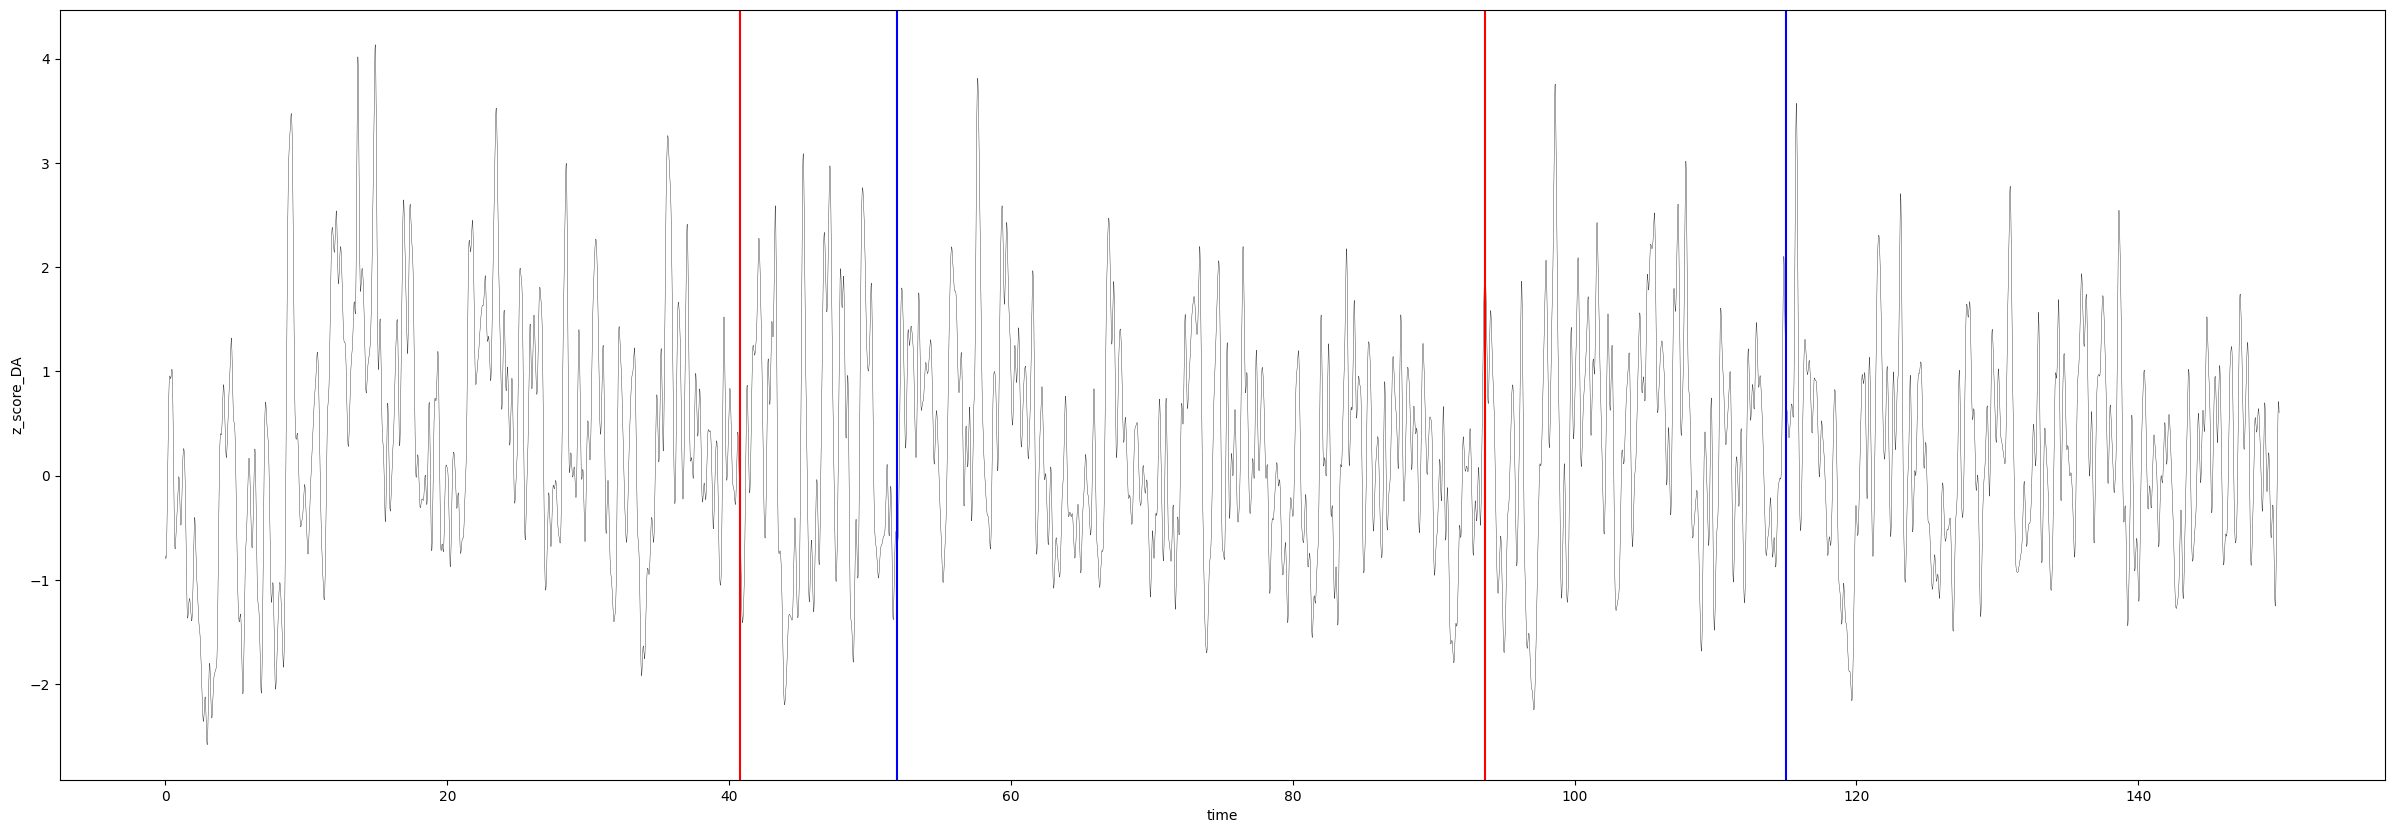

In [111]:
fig, ax = plt.subplots(figsize=(30,10))

sns.lineplot(first_500,x='time', y="z_score_DA", ax = ax, color = 'k', linewidth = 0.25)

for c in first_500['CueA'].unique():
    if c >0 and c < 150:
        plt.axvline(x=c, color='red')
for s in first_500['AvdA'].unique():
    if s >0 and s < 150:
        plt.axvline(x=s, color='blue')
for e in first_500['ShkA'].unique():
    if e > 0 and e < 150:
        plt.axvline(x = e, color = 'green')

In [104]:
first_500['ShkA']

ShkA
f64
0.0
490.610524
1107.9313
1351.691797
-100.0
…
-100.0
-100.0
-100.0


27.624319895116358

1657.4601769911505